In [2]:
##analyze the Hk results

from glob import glob
from unittest import result 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plottable import ColumnDefinition, Table
from matplotlib.font_manager import FontProperties

zhfont1 = FontProperties(fname='/usr/share/fonts/font/simhei.ttf', size=9)
##for RFAC_2layer
depths = [1,2,3,4,5,6,7,8,9]
ks = 2.3
ndepth = len(depths)
results_myHk = np.zeros([ndepth,4])
results_Yeck = np.zeros([ndepth,4])
results_Yu = np.zeros([ndepth,4])
results_Akinremi = np.zeros([ndepth,2])
noise_tag = "sn"
save_tag = f"52_{noise_tag}"


for i in range(ndepth):
    depth = depths[i]
    save_filename = f"Hk_result_52_10_pws2_Hk_result.npz"
    result_file = f"synthetic_data_S1.0/Varyp_sediment_crust_mantle_synthetics_c35_ks{ks}_dt0.01/sediments_depth{depth}/{save_filename}"
    data_RFAC = np.load(result_file)
    Hs2 = data_RFAC['Hs_optimal'][0]
    Ks2 = data_RFAC['Ks_optimal'][0]
    Hm2 = data_RFAC['Hs_optimal'][1]
    Km2 = data_RFAC['Ks_optimal'][1]
    results_myHk[i,0] = Hs2
    results_myHk[i,1] = Ks2
    results_myHk[i,2] = Hm2
    results_myHk[i,3] = Km2

    result_file = f"synthetic_data_S1.0/Varyp_sediment_crust_mantle_synthetics_c35_ks{ks}_dt0.01/Hkresults_Yeck2013/sediments_depth{depth}_sn/sediments_depth{depth}_Hk_result.dat"
    data_RFAC = np.loadtxt(result_file,skiprows=1)
    Hs2 = data_RFAC[0,1]
    Ks2 = data_RFAC[0,2]
    Hm2 = data_RFAC[1,1]
    Km2 = data_RFAC[1,2]
    results_Yeck[i,0] = Hs2
    results_Yeck[i,1] = Ks2
    results_Yeck[i,2] = Hm2
    results_Yeck[i,3] = Km2

    result_file = f"synthetic_data_S1.0/Varyp_sediment_crust_mantle_synthetics_c35_ks{ks}_dt0.01/Hkresults_Yu2015/sediments_depth{depth}_sn/sediments_depth{depth}_Hk_result.dat"
    data_RFAC = np.loadtxt(result_file,skiprows=1)
    Hm2 = data_RFAC[0,1]
    Km2 = data_RFAC[0,2]
    Hs2 = data_RFAC[1,1]
    Ks2 = data_RFAC[1,2]
    results_Yu[i,0] = Hs2
    results_Yu[i,1] = Ks2
    results_Yu[i,2] = Hm2
    results_Yu[i,3] = Km2

    result_file = f"synthetic_data_S1.0/Varyp_sediment_crust_mantle_synthetics_c35_ks{ks}_dt0.01/Hkresults_FWT_Akinremi2024/sediments_depth{depth}_sn/wfit_result.dat"
    data_RFAC = np.loadtxt(result_file,skiprows=0)
    Hm2 = data_RFAC[0]
    Km2 = data_RFAC[1]
    results_Akinremi[i,0] = Hm2-depth
    results_Akinremi[i,1] = Km2


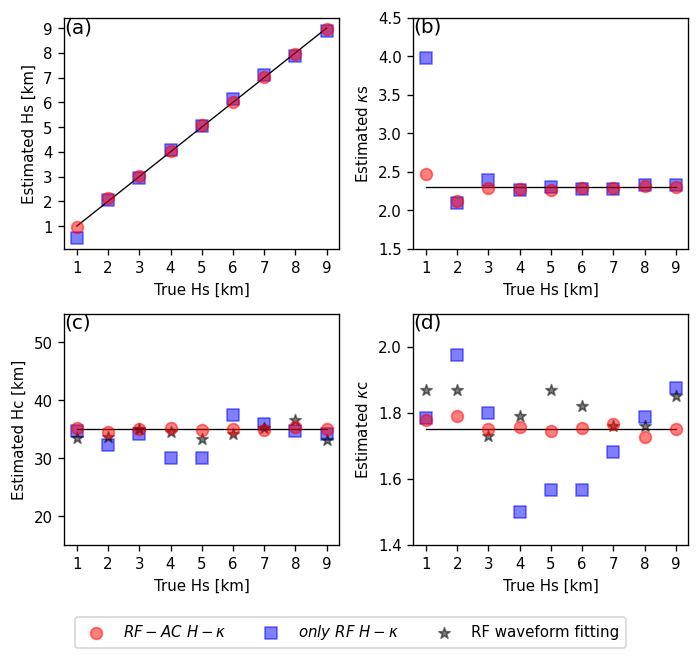

In [6]:
from matplotlib.pyplot import tight_layout

fig, axs = plt.subplots(2,2,figsize=(15/2.54,13/2.54),tight_layout=True)
plt.rcParams.update({"font.size":9})
%matplotlib inline
plt.rcParams['figure.dpi'] = 120
makersize = 50

axs[0,0].scatter(depths,results_myHk[:,0],s=makersize,marker="o",color='red', alpha=0.50, zorder=10)
axs[0,0].scatter(depths,results_Yeck[:,0],s=makersize,marker="s",color='b', alpha=0.50)
#axs[0,0].scatter(depths,results_Yu[:,0],s=makersize,marker="^",color='orange',alpha=0.50)
axs[0,0].plot(depths,depths,lw=0.8, color='black')
# axs[0,0].legend(loc='upper left')
axs[0,0].set_xticks(depths)
axs[0,0].set_yticks(depths)
axs[0,0].set_xlabel("True Hs [km]")
axs[0,0].set_ylabel("Estimated Hs [km]")
xmin,xmax = axs[0,0].get_xlim()
ymin,ymax = axs[0,0].get_ylim()
axs[0,0].text(xmin,ymax,"(a)",fontsize=12,horizontalalignment="left",verticalalignment="top")


axs[0,1].scatter(depths,results_myHk[:,1],s=makersize,marker="o",color='r',label=r"$RF-AC\ H-\kappa$", alpha=0.50, zorder=10)
axs[0,1].scatter(depths,results_Yeck[:,1],s=makersize,marker="s",color='b',label=r"$only\ RF\ H-\kappa$",alpha=0.50)
#axs[0,1].scatter(depths,results_Yu[:,1],s=makersize,marker="^",color='orange',label=r"$only\ RF\ H-\kappa\ after\ resonance\ filter$", alpha=0.50)
axs[0,1].scatter(depths,np.zeros([len(depths)]),s=makersize,marker="*",color='k',label="RF waveform fitting", alpha=0.50)
ks_true = np.ones([len(depths)])*ks
axs[0,1].plot(depths,ks_true,lw=0.8, color='black')
# axs[0,1].legend(loc='upper right')
axs[0,1].set_xticks(depths)
axs[0,1].set_ylim(1.5,4.5)
axs[0,1].set_xlabel("True Hs [km]")
axs[0,1].set_ylabel(r"Estimated $\kappa$s")
xmin,xmax = axs[0,1].get_xlim()
ymin,ymax = axs[0,1].get_ylim()
axs[0,1].text(xmin,ymax,"(b)",fontsize=12,horizontalalignment="left",verticalalignment="top")



axs[1,0].scatter(depths,results_myHk[:,2],s=makersize,marker="o",color='red', alpha=0.50, zorder=10)
axs[1,0].scatter(depths,results_Yeck[:,2],s=makersize,marker="s",color='blue', alpha=0.50)
#axs[1,0].scatter(depths,results_Yu[:,2],s=makersize,marker="^",color='orange', alpha=0.50)
axs[1,0].scatter(depths,results_Akinremi[:,0],s=makersize,marker="*",color='k', alpha=0.50)
Hc_true = np.ones([len(depths)])*35
axs[1,0].plot(depths,Hc_true,lw=0.8, color='black')
# axs[1,0].legend(loc='lower right')
axs[1,0].set_xticks(depths)
axs[1,0].set_ylim(15,55)
axs[1,0].set_xlabel("True Hs [km]")
axs[1,0].set_ylabel("Estimated Hc [km]")
xmin,xmax = axs[1,0].get_xlim()
ymin,ymax = axs[1,0].get_ylim()
axs[1,0].text(xmin,ymax,"(c)",fontsize=12,horizontalalignment="left",verticalalignment="top")



axs[1,1].scatter(depths,results_myHk[:,3],s=makersize,marker="o",color='r', alpha=0.50, zorder=10)
axs[1,1].scatter(depths,results_Yeck[:,3],s=makersize,marker="s",color='b', alpha=0.50)
#axs[1,1].scatter(depths,results_Yu[:,3],s=makersize,marker="^",color='orange', alpha=0.50)
axs[1,1].scatter(depths,results_Akinremi[:,1],s=makersize,marker="*",color='k',alpha=0.50)
kc_true = np.ones([len(depths)])*1.75
axs[1,1].plot(depths,kc_true,lw=0.8, color='black')
# axs[1,1].legend(loc='lower right')
axs[1,1].set_xticks(depths)
axs[1,1].set_xlabel("True Hs [km]")
axs[1,1].set_ylabel(r"Estimated $\kappa$c")
axs[1,1].set_ylim(1.4,2.1)
xmin,xmax = axs[1,1].get_xlim()
ymin,ymax = axs[1,1].get_ylim()
axs[1,1].text(xmin,ymax,"(d)",fontsize=12,horizontalalignment="left",verticalalignment="top")

fig.legend(loc='upper center',	bbox_to_anchor=(0.5, 0),ncol=3)
plt.savefig("Figures/Hk_results_contrast_cohf_DeRe.jpg",dpi=900)
plt.show()

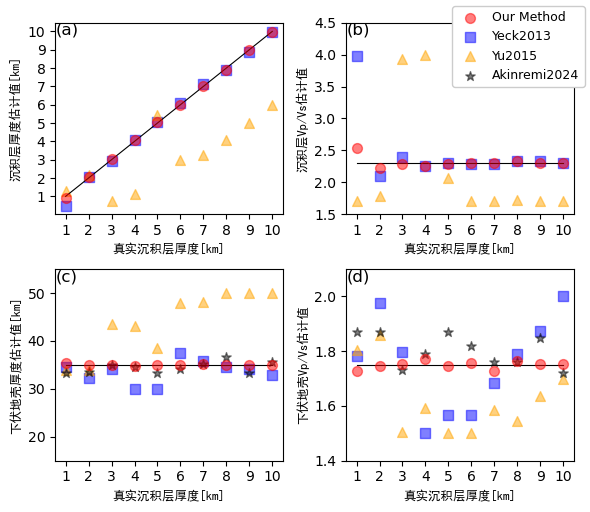

In [2]:
from matplotlib.pyplot import tight_layout


fig, axs = plt.subplots(2,2,figsize=(15/2.54,13/2.54),tight_layout=True)
plt.rcParams.update({"font.size":9})

makersize = 50

axs[0,0].scatter(depths,results_myHk[:,0],s=makersize,marker="o",color='red', alpha=0.50, zorder=10)
axs[0,0].scatter(depths,results_Yeck[:,0],s=makersize,marker="s",color='b', alpha=0.50)
axs[0,0].scatter(depths,results_Yu[:,0],s=makersize,marker="^",color='orange',alpha=0.50)
axs[0,0].plot(depths,depths,lw=0.8, color='black')
# axs[0,0].legend(loc='upper left')
axs[0,0].set_xticks(depths)
axs[0,0].set_yticks(depths)
axs[0,0].set_xlabel("真实沉积层厚度[km]",font=zhfont1)
axs[0,0].set_ylabel("沉积层厚度估计值[km]",font=zhfont1)
xmin,xmax = axs[0,0].get_xlim()
ymin,ymax = axs[0,0].get_ylim()
axs[0,0].text(xmin,ymax,"(a)",fontsize=12,horizontalalignment="left",verticalalignment="top")


axs[0,1].scatter(depths,results_myHk[:,1],s=makersize,marker="o",color='r',label="Our Method", alpha=0.50, zorder=10)
axs[0,1].scatter(depths,results_Yeck[:,1],s=makersize,marker="s",color='b',label="Yeck2013",alpha=0.50)
axs[0,1].scatter(depths,results_Yu[:,1],s=makersize,marker="^",color='orange',label="Yu2015", alpha=0.50)
axs[0,1].scatter(depths,np.zeros([len(depths)]),s=makersize,marker="*",color='k',label="Akinremi2024", alpha=0.50)
ks_true = np.ones([len(depths)])*ks
axs[0,1].plot(depths,ks_true,lw=0.8, color='black')
# axs[0,1].legend(loc='upper right')
axs[0,1].set_xticks(depths)
axs[0,1].set_ylim(1.5,4.5)
axs[0,1].set_xlabel("真实沉积层厚度[km]",font=zhfont1)
axs[0,1].set_ylabel("沉积层Vp/Vs估计值",font=zhfont1)
xmin,xmax = axs[0,1].get_xlim()
ymin,ymax = axs[0,1].get_ylim()
axs[0,1].text(xmin,ymax,"(b)",fontsize=12,horizontalalignment="left",verticalalignment="top")



axs[1,0].scatter(depths,results_myHk[:,2],s=makersize,marker="o",color='red', alpha=0.50, zorder=10)
axs[1,0].scatter(depths,results_Yeck[:,2],s=makersize,marker="s",color='blue', alpha=0.50)
axs[1,0].scatter(depths,results_Yu[:,2],s=makersize,marker="^",color='orange', alpha=0.50)
axs[1,0].scatter(depths,results_Akinremi[:,0],s=makersize,marker="*",color='k', alpha=0.50)
Hc_true = np.ones([len(depths)])*35
axs[1,0].plot(depths,Hc_true,lw=0.8, color='black')
# axs[1,0].legend(loc='lower right')
axs[1,0].set_xticks(depths)
axs[1,0].set_ylim(15,55)
axs[1,0].set_xlabel("真实沉积层厚度[km]",font=zhfont1)
axs[1,0].set_ylabel("下伏地壳厚度估计值[km]",font=zhfont1)
xmin,xmax = axs[1,0].get_xlim()
ymin,ymax = axs[1,0].get_ylim()
axs[1,0].text(xmin,ymax,"(c)",fontsize=12,horizontalalignment="left",verticalalignment="top")



axs[1,1].scatter(depths,results_myHk[:,3],s=makersize,marker="o",color='r', alpha=0.50, zorder=10)
axs[1,1].scatter(depths,results_Yeck[:,3],s=makersize,marker="s",color='b', alpha=0.50)
axs[1,1].scatter(depths,results_Yu[:,3],s=makersize,marker="^",color='orange', alpha=0.50)
axs[1,1].scatter(depths,results_Akinremi[:,1],s=makersize,marker="*",color='k',alpha=0.50)
kc_true = np.ones([len(depths)])*1.75
axs[1,1].plot(depths,kc_true,lw=0.8, color='black')
# axs[1,1].legend(loc='lower right')
axs[1,1].set_xticks(depths)
axs[1,1].set_xlabel("真实沉积层厚度[km]",font=zhfont1)
axs[1,1].set_ylabel("下伏地壳Vp/Vs估计值",font=zhfont1)
axs[1,1].set_ylim(1.4,2.1)
xmin,xmax = axs[1,1].get_xlim()
ymin,ymax = axs[1,1].get_ylim()
axs[1,1].text(xmin,ymax,"(d)",fontsize=12,horizontalalignment="left",verticalalignment="top")
fig.legend(loc='upper right',framealpha=1)
plt.savefig("Figures/Hk_results_contrast_cohf_chineselabels_DeRe.jpg",dpi=900)
plt.show()